In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


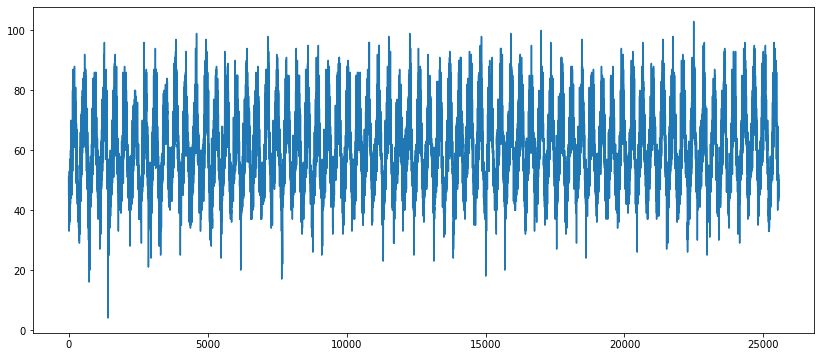

In [7]:
plt.figure(figsize=(14,6))
df['TMAX'].plot()
#df['TMAX'].plot()

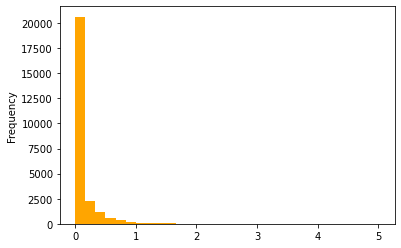

In [11]:
df['PRCP'].plot(kind='hist',bins=30,color='orange')

In [12]:
df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
 5   rain    25551 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [16]:
df.dropna(inplace=True)

In [17]:
X=df[['PRCP','TMAX','TMIN']]
y=df[['rain']]

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=41)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [21]:
import keras
from keras.layers import Dense
from keras.models import Sequential


In [22]:
ann=Sequential()
ann.add(Dense(units=32,init='uniform',activation='relu',input_dim=3))
ann.add(Dense(units=16,init='uniform',activation='relu'))
ann.add(Dense(units=1,init='uniform',activation='sigmoid'))
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=3, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [26]:
ann.fit(xtrain,ytrain,batch_size=10,nb_epoch=10,verbose=1)

Epoch 1/10
 1410/20438 [=>............................] - ETA: 2s - loss: 5.8304e-07 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


20438/20438 [==============================] - 2s 107us/step - loss: 0.0010 - accuracy: 0.9989
Epoch 2/10
20438/20438 [==============================] - 2s 108us/step - loss: 6.4268e-04 - accuracy: 0.9993
Epoch 3/10
20438/20438 [==============================] - 2s 106us/step - loss: 1.6174e-04 - accuracy: 0.9999
Epoch 4/10
20438/20438 [==============================] - 2s 111us/step - loss: 5.2910e-04 - accuracy: 0.9995
Epoch 5/10
20438/20438 [==============================] - 2s 108us/step - loss: 0.0030 - accuracy: 0.9969
Epoch 6/10
20438/20438 [==============================] - 2s 107us/step - loss: 5.7395e-04 - accuracy: 0.9993
Epoch 7/10
20438/20438 [==============================] - 2s 108us/step - loss: 4.7689e-06 - accuracy: 1.0000
Epoch 8/10
20438/20438 [==============================] - 2s 107us/step - loss: 0.0046 - accuracy: 0.9951
Epoch 9/10
20438/20438 [==============================] - 2s 106us/step - loss: 1.0866e-04 - accuracy: 0.9999
Epoch 10/10
20438/20438 [========

In [28]:
Y_pred=ann.predict(xtest)
Y_pred=[1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 